In [46]:
import sys
import matplotlib.pyplot as plt
import numpy as np
from PIL import Image as im
from scipy.ndimage import interpolation as inter

In [47]:
img = im.open(r'test_skew.png')

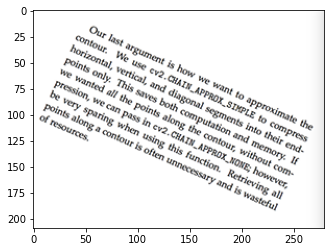

In [48]:
plt.imshow(img)

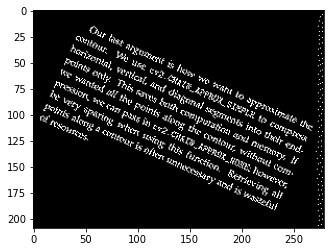

In [49]:
# convert image to binary

wd, ht = img.size
pix = np.array(img.convert('1').getdata(), np.uint8)
bin_img = 1 - (pix.reshape((ht, wd)) / 255.0)
plt.imshow(bin_img, cmap='gray')
plt.savefig('binary.png')

In [50]:
def find_score(arr, angle):
    data = inter.rotate(arr, angle, reshape=False, order=0)
    hist = np.sum(data, axis=1)
    score = np.sum((hist[1:] - hist[:-1]) ** 2)
    return hist, score

In [51]:
delta = 1
limit = 5
angles = np.arange(-limit, limit + delta, delta)
scores = []

for angle in angles:
    hist, score = find_score(bin_img, angle)
    scores.append(score)

best_score = max(scores)
best_angle = angles[scores.index(best_score)]
print('Best angle: {}'.format(best_angle))

Best angle: 2


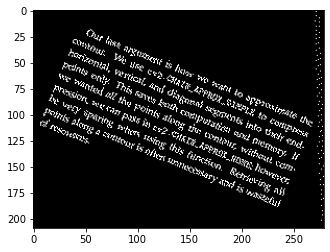

In [52]:
# correct skew
data = inter.rotate(bin_img, best_angle, reshape=False, order=0)
new_img = im.fromarray((255 * data).astype("uint8")).convert("RGB")
new_img.save('skew_corrected.png')

new_image = im.open(r'skew_corrected.png')
plt.imshow(new_image)